In [2]:
import cv2
import cv2.aruco as aruco
from glob import glob
import pandas as pd
from os.path import basename
from scipy import stats
import numpy as np

In [4]:
# Define the parameters for the Charuco board
num_squares_x = 5
num_squares_y = 7
square_length = 100
marker_length = 80

# Create the Charuco board
board = aruco.CharucoBoard(
    size=(num_squares_x, num_squares_y),
    squareLength=square_length,
    markerLength=marker_length,
    dictionary=aruco.getPredefinedDictionary(aruco.DICT_4X4_50)
)

In [22]:
images = pd.DataFrame(glob(
    '../../../bilderserien/Focustest/fokus_serie/*.jpg'), columns=['path'])
images.reset_index(inplace=True)
images.rename(inplace=True, columns={"index": "img_id"})
images.set_index("img_id", inplace=True)
images["focus"] = [float(basename(i)[1:4]) for i in images["path"]]
images

,path,focus
img_id,,
0,../../../bilderserien/Focustest/fokus_serie/f4...,4.0
1,../../../bilderserien/Focustest/fokus_serie/f0...,0.5
2,../../../bilderserien/Focustest/fokus_serie/f0...,0.5
3,../../../bilderserien/Focustest/fokus_serie/f0...,0.5
4,../../../bilderserien/Focustest/fokus_serie/f0...,0.5
5,../../../bilderserien/Focustest/fokus_serie/f1...,1.0
6,../../../bilderserien/Focustest/fokus_serie/f1...,1.0
7,../../../bilderserien/Focustest/fokus_serie/f1...,1.0
8,../../../bilderserien/Focustest/fokus_serie/f1...,1.0


In [4]:
marker_tmp = []
for img_id, img in images.iterrows():
    # Load the image
    image = cv2.imread(img["path"])

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect Charuco markers
    corners, ids, rejected = aruco.detectMarkers(
        gray, aruco.getPredefinedDictionary(aruco.DICT_4X4_50))

    # If markers are found, detect Charuco board
    if len(corners) > 0:
        retval, charuco_corners, charuco_ids = aruco.interpolateCornersCharuco(
            corners, ids, gray, board)
        for i in range(len(charuco_corners)):
            marker_tmp.append([img_id, charuco_corners[i][0][0],
                               charuco_corners[i][0][1], charuco_ids[i][0]])
marker = pd.DataFrame(
    marker_tmp, columns=["img_id", "corner_x", "corner_y", "marker_id"])

In [5]:
j = marker.join(images, on="img_id")
j

,img_id,corner_x,corner_y,marker_id,path,focus
0,0,3233.838379,725.886414,0,../../../bilderserien/Focustest/fokus_serie/f4...,4.0
1,0,3267.641113,1102.260376,1,../../../bilderserien/Focustest/fokus_serie/f4...,4.0
2,0,3303.715332,1503.645386,2,../../../bilderserien/Focustest/fokus_serie/f4...,4.0
3,0,3342.968994,1930.902710,3,../../../bilderserien/Focustest/fokus_serie/f4...,4.0
4,0,2834.748779,732.985718,4,../../../bilderserien/Focustest/fokus_serie/f4...,4.0
...,...,...,...,...,...,...
819,43,2946.255615,1954.344971,7,../../../bilderserien/Focustest/fokus_serie/f9...,9.0
820,43,2453.722656,1104.857178,9,../../../bilderserien/Focustest/fokus_serie/f9...,9.0
821,43,2475.479004,1516.440918,10,../../../bilderserien/Focustest/fokus_serie/f9...,9.0
822,43,2036.646973,1102.862183,13,../../../bilderserien/Focustest/fokus_serie/f9...,9.0


In [6]:
k = j.groupby(["marker_id", "focus",]).agg(
    {"corner_x": "mean", "corner_y": "mean"})
# .pivot_table(index="focus", columns="marker_id", values=["corner_x", "corner_y"])

In [7]:
c = ((0.0047)/0.0000014)
k["corner_x_norm"] = (k["corner_x"]-2304)/c
k["corner_y_norm"] = (k["corner_y"]-(2592/2))/c

In [8]:
tmp = k.reset_index()
print(tmp.groupby("focus").count())
m = tmp[tmp["focus"] == 5.0]["marker_id"].unique()
m

       marker_id  corner_x  corner_y  corner_x_norm  corner_y_norm
focus                                                             
0.5           15        15        15             15             15
1.0           16        16        16             16             16
2.0           24        24        24             24             24
3.0           24        24        24             24             24
4.0           24        24        24             24             24
5.0           24        24        24             24             24
6.0           24        24        24             24             24
7.0           24        24        24             24             24
8.0           19        19        19             19             19
9.0           16        16        16             16             16
10.0           8         8         8              8              8


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int32)

In [9]:
k["corner_x_faktor"] = 0
k["corner_y_faktor"] = 0
k

corner_x     corner_y  corner_x_norm  corner_y_norm  \
marker_id focus                                                           
0         0.5    3209.078125   739.322021       0.269598      -0.165819   
          1.0    3213.105469   736.578552       0.270797      -0.166636   
          2.0    3214.094238   738.938049       0.271092      -0.165933   
          3.0    3226.717285   730.385498       0.274852      -0.168481   
          4.0    3234.410156   725.463318       0.277143      -0.169947   
...                      ...          ...            ...            ...   
23        3.0    1179.175171  1955.536011      -0.335054       0.196458   
          4.0    1166.962402  1962.809204      -0.338692       0.198624   
          5.0    1157.728760  1968.255371      -0.341442       0.200246   
          6.0    1150.679688  1972.166626      -0.343542       0.201411   
          7.0    1144.648071  1975.269531      -0.345339       0.202336   

                 corner_x_faktor  corner_y_faktor  
marker_id focus                                    
0         0.5                  0                0  
          1.0                  0                0  
          2.0                  0                0  
          3.0                  0                0  
          4.0                  0                0  
...                          ...              ...  
23        3.0                  0                0  
          4.0                  0                0  
          5.0                  0                0  
          6.0                  0                0  
          7.0                  0                0  

[218 rows x 6 columns]

In [10]:
for i in m:
    ref = k.loc[i, 5.0]
    for s in k.loc[i].index:
        k.at[(i, s), "corner_x_faktor"] = k.loc[i,
                                                s]["corner_x_norm"] / ref["corner_x_norm"]
        k.at[(i, s), "corner_y_faktor"] = k.loc[i,
                                                s]["corner_y_norm"] / ref["corner_y_norm"]

/tmp/ipykernel_12082/3448089226.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.9650585236550953' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  k.at[(i, s), "corner_x_faktor"] = k.loc[i,
/tmp/ipykernel_12082/3448089226.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.967966674854891' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  k.at[(i, s), "corner_y_faktor"] = k.loc[i,


In [14]:
faktor = k.groupby("focus").agg(
    {"corner_x_faktor": "mean", "corner_y_faktor": "mean"})
faktor

,corner_x_faktor,corner_y_faktor
focus,,
0.5,0.967116,0.964827
1.0,0.970362,0.970429
2.0,0.975161,0.972732
3.0,0.979596,0.981183
4.0,0.991064,0.990639
5.0,1.000000,1.000000
6.0,1.005992,1.006328
7.0,1.009976,1.012079
8.0,1.013691,1.017066


In [17]:
f = 0.00474
faktor["soll"] = (1/((1/f)-faktor.reset_index()["focus"]))/(1/((1/f)-5))
faktor

,corner_x_faktor,corner_y_faktor,soll
focus,,,
0.5,0.967116,0.964827,NaN
1.0,0.970362,0.970429,0.980950
2.0,0.975161,0.972732,0.985644
3.0,0.979596,0.981183,0.990383
4.0,0.991064,0.990639,0.995168
5.0,1.000000,1.000000,1.000000
6.0,1.005992,1.006328,1.004879
7.0,1.009976,1.012079,1.009805
8.0,1.013691,1.017066,1.014780


<AxesSubplot: xlabel='focus'>

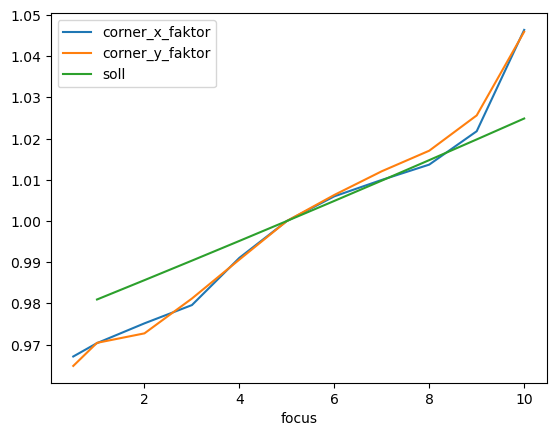

In [23]:
faktor.plot()

In [37]:
# Load the image
image1: str = list(images[images["focus"] == 5.]["path"])[0]
image2: str = list(images[images["focus"] == 9.]["path"])[0]
sift = cv2.SIFT_create()  # type: ignore

In [38]:
def find_sift(p: str):
    image = cv2.imread(p)
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect SURF keypoints and compute descriptors
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    return keypoints, descriptors

In [40]:
k1, d1 = find_sift(image1)
k2, d2 = find_sift(image2)

In [43]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(d1, d2, k=2)
# store all the good matches as per Lowe's ratio test.
good = []
for m, n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

In [92]:
matches = pd.DataFrame(np.array([[k1[m.queryIdx].pt, k2[m.trainIdx].pt]
                       for m in good]).reshape(-1, 4), columns=["x1", "y1", "x2", "y2"])

<AxesSubplot: xlabel='x1', ylabel='diff_x'>

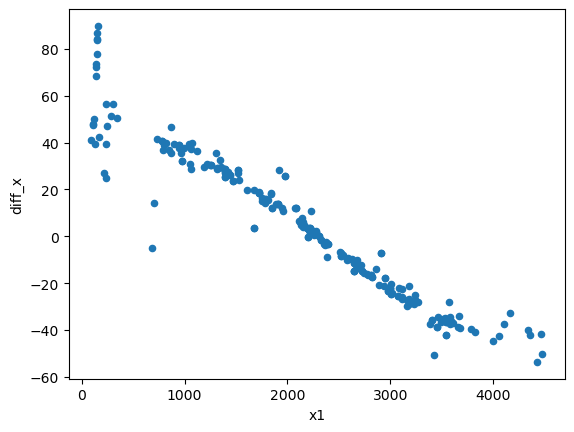

In [134]:
matches["diff_x"] = matches["x1"]-matches["x2"]
matches["diff_y"] = matches["y1"]-matches["y2"]
matches["distance"] = np.sqrt(matches["diff_x"]**2+matches["diff_y"]**2)
matches = matches[matches["distance"] < 250]
matches.plot.scatter(x="x1", y="diff_x")

In [154]:
from sklearn.linear_model import LinearRegression
x = matches[['x1']]
y = matches[['diff_x']]
model = LinearRegression()
model.fit(x, y)
ax = model.coef_[0][0]
mx = model.intercept_[0]
dx = mx/ax
ax, dx

(-0.027112450991019443, -2295.8451112776233)

In [153]:
from sklearn.linear_model import LinearRegression
x = matches[['y1']]
y = matches[['diff_y']]
model = LinearRegression()
model.fit(x, y)
ay = model.coef_[0][0]
my = model.intercept_[0]
dy = my/ay
ay, dy

(-0.029715089484804093, -1202.3156538235498)

In [159]:
matches["x1n"] = matches["x1"]+dx
matches["y1n"] = matches["y1"]+dy

<AxesSubplot: xlabel='dn', ylabel='distance_'>

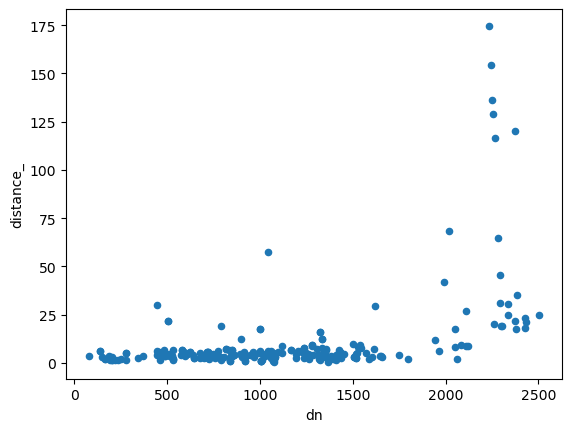

In [162]:
matches["diff_x_"] = matches["diff_x"]-matches["x1n"]*ax
matches["diff_y_"] = matches["diff_y"]-matches["y1n"]*ay
matches["distance_"] = np.sqrt(matches["diff_x_"]**2+matches["diff_y_"]**2)
matches["dn"] = np.sqrt(matches["x1n"]**2+matches["y1n"]**2)
matches.plot.scatter(x="dn", y="distance_")

<AxesSubplot: xlabel='x1n', ylabel='diff_faktor'>

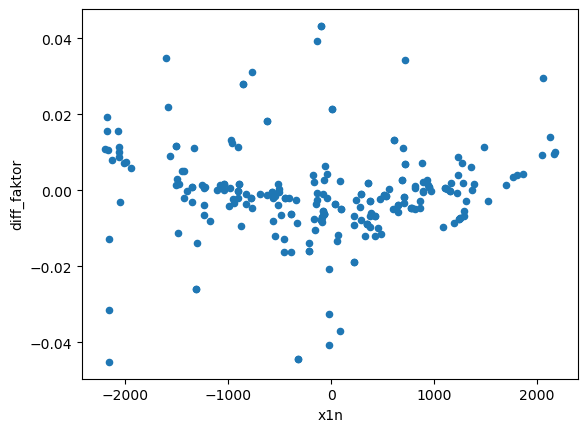

In [185]:
matches["diff_faktor"] = (
    matches["diff_x_"]/matches["x1n"] + matches["diff_y_"]/matches["y1n"])/2

matches[abs(matches["diff_faktor"]) < 0.05].plot.scatter(
    x="x1n", y="diff_faktor")

0.0012140226290111439 3.1352446762880817


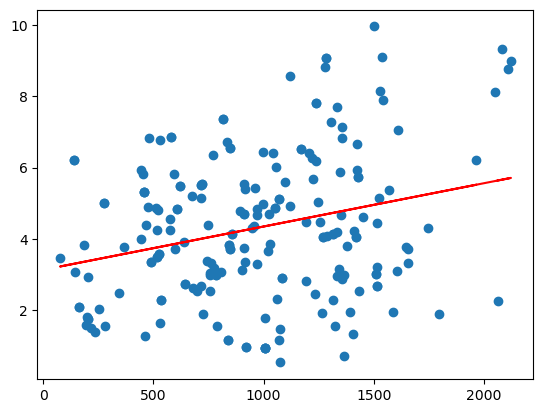

In [168]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
x = matches[['dn']]
y = matches[['distance_']]
model = LinearRegression()
model.fit(x, y)
print(model.coef_[0][0], model.intercept_[0])

y_pred = model.predict(x)  # make predictions
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()